### 可视化一个minibatch中的数据分布

In [17]:
import torch
import os
import numpy as np
from sklearn import manifold
import random
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import pair_confusion_matrix
import torch.nn.functional as F
from sklearn.preprocessing import normalize

path = "/home/linhuadong/DNFNet/jobs/prw_protonorm6"
id_labels = torch.load(os.path.join(path, "id_labels_pn6.pth")).cpu().detach().numpy()
id_pred = torch.load(os.path.join(path, "id_pred_pn6.pth")).cpu().detach().numpy()
id_gt = torch.load(os.path.join(path, "gt_id_pn6.pth")).cpu().detach().numpy()

id_gt1 = id_gt[id_labels!=-2]
id_pred1 = id_pred[id_labels!=-2]
id_gt2 = id_gt1[id_gt1!=-1]
id_pred2 = id_pred1[id_gt1!=-1]

/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


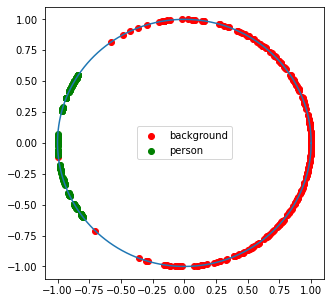

/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


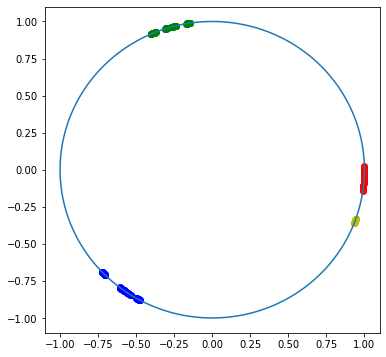

In [25]:
def vis_bg_person(X, Y):
    plt.figure(figsize=(5, 5))
    data_n = normalize(X, norm="l2", axis=1,copy=True, return_norm=False)
    colors = ['r', 'g', 'b', 'y', 'c', 'tan', 'olivedrab', 'plum', 'm', 'hotpink', 'crimson', 'orange', 'khaki', 'lightcyan', 'linen', 'steelblue']
    # ids = np.unique(Y)
    # for i, id in enumerate(ids):
    #     plt.scatter(data_n[Y==id][:, 0], data_n[Y==id][:,1], c=colors[i])
    plt.scatter(data_n[Y==-2][:,0], data_n[Y==-2][:,1], c="r")
    plt.scatter(data_n[Y!=-2][:,0], data_n[Y!=-2][:,1], c="g")
    plt.legend(["background", "person"])
    theta = np.arange(0, 2*np.pi, 0.01)
    cx = np.cos(theta)
    cy = np.sin(theta)
    plt.plot(cx,cy)
    plt.show()

def vis_person(X, Y):
    colors = ['r', 'g', 'b', 'y', 'c']
    plt.figure(figsize=(6, 6))
    data_n = normalize(X, norm="l2", axis=1,copy=True, return_norm=False)
    ids = np.unique(id_gt2)
    for i, id in enumerate(ids):
        plt.scatter(data_n[Y==id][:, 0], data_n[Y==id][:,1], c=colors[i])
    theta = np.arange(0, 2*np.pi, 0.01)
    cx = np.cos(theta)
    cy = np.sin(theta)
    plt.plot(cx,cy)
    plt.show()

X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=500, init='pca', random_state=501, n_iter=600, verbose=0, metric='cosine').fit_transform(id_pred)
vis_bg_person(X_tsne, id_labels)

X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=500, init='pca', random_state=501, n_iter=600, verbose=0, metric='cosine').fit_transform(id_pred2)
vis_person(X_tsne, id_gt2)

### 可视化test数据集行人分布

In [34]:
import pickle
import torch
import os
import numpy as np
from sklearn import manifold
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.preprocessing import normalize

path = "/home/linhuadong/DNFNet/jobs/prw_protonorm2"
with open(os.path.join(path, 'evaluate_result.pkl'), 'rb') as fid:
    evaluate_result = pickle.load(fid)
# gallery_set = torch.load(os.path.join(path, "gallery_set.pth"))


In [35]:
evaluate_result

{'image_root': '/home/linhuadong/dataset/PRW/frames',
 'results': [{'probe_img': 'c1s3_016471.jpg',
   'probe_roi': [1750, 407, 1836, 624],
   'probe_gt': {'c1s3_003646.jpg': array([[1626,  419, 1715,  629]], dtype=int32),
    'c1s3_017346.jpg': array([[586, 463, 642, 624]], dtype=int32),
    'c3s1_150758.jpg': array([[1759,  424, 1821,  607]], dtype=int32),
    'c3s1_150808.jpg': array([[1607,  405, 1682,  629]], dtype=int32),
    'c3s1_150933.jpg': array([[800, 398, 866, 703]], dtype=int32),
    'c3s1_150958.jpg': array([[551, 400, 649, 710]], dtype=int32),
    'c3s1_150983.jpg': array([[359, 360, 467, 666]], dtype=int32),
    'c3s2_001921.jpg': array([[670, 405, 788, 720]], dtype=int32),
    'c3s2_001946.jpg': array([[842, 395, 952, 701]], dtype=int32),
    'c3s2_001971.jpg': array([[ 980,  398, 1101,  694]], dtype=int32),
    'c3s2_001996.jpg': array([[1106,  402, 1215,  685]], dtype=int32),
    'c3s2_002046.jpg': array([[1380,  422, 1444,  648]], dtype=int32),
    'c3s2_002096.jpg